In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

path = r"UHT milk P036.csv"
 
df = pd.read_csv(path)

def count_no_of_modifications(ptm_str):
    #check if NaN value
    if pd.isnull(ptm_str):
        return 0
    return 1 + ptm_str.count(';')

#apply count_no_of_modifications to each PTM column
df['#modifications'] = df['PTM'].apply(count_no_of_modifications)
#print non zero values in modifcations column
df[df['#modifications'] > 0]

,Protein Group,Protein ID,Protein Accession,Peptide,Unique,-10lgP,Mass,Length,ppm,m/z,...,#Feature Sample 1,#Feature Sample 2,#Feature Sample 3,#Feature Sample 4,Start,End,PTM,AScore,Found By,#modifications
2,3,10,P02666,R.DM(+15.99)PIQAFLLYQEPVLGPVRGPFPIIV,Y,70.64,2924.5874,26,-3.3,1463.2902,...,2,2,2,2,199,224,Oxidation (M),M2:Oxidation (M):1000.00,PEAKS DB,1
5,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQ(+.98)S(-18.01)W...,Y,69.56,6357.2168,56,8.7,1272.4542,...,2,0,1,1,129,184,Deamidation (NQ); lal; Oxidation (M),Q28:Deamidation (NQ):10.19;S29:lal:71.89;M31:O...,PEAKS DB,3
8,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQSWM(+15.99)HQPHQ...,Y,65.11,6374.2437,56,2.4,1275.8551,...,2,3,0,1,129,184,Oxidation (M),M31:Oxidation (M):111.64,PEAKS DB,1
9,3,10,P02666,A.RELEELNVPGEIVESLS(+79.97)S(+79.97)S(+79.97)E...,Y,64.46,3041.2920,25,-2.1,1521.6434,...,2,2,3,1,16,40,Phosphorylation (STY),S17:Phosphorylation (STY):30.83;S18:Phosphoryl...,PEAKS DB,1
11,3,10,P02666,K.YPVEPFTESQSLTLTDVENLHLPLPLLQSWMHQ(+.98)PHQPL...,Y,63.57,6359.2324,56,0.2,1272.8501,...,0,0,1,0,129,184,Deamidation (NQ),Q33:Deamidation (NQ):10.19,PEAKS DB,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,104,132,A5D9E6,E.TSK(-18.01)GDQLSK.S,Y,25.37,944.4927,9,-9.2,473.2478,...,0,0,0,1,151,159,lal,K3:lal:0.00,PEAKS DB,1
5373,87,123,A7E3W7,M.QAS(-18.01)LDLGTD.K,Y,25.25,900.4189,9,4.5,901.4262,...,0,0,1,0,162,170,lal,S3:lal:1000.00,PEAKS DB,1
5374,86,128,E1BLY0,E.GS(-18.01)K(-18.01)AAGG.G,Y,25.05,510.2550,7,-5.1,511.2567,...,1,0,0,0,646,652,lal,S2:lal:1000.00;K3:lal:1000.00,PEAKS DB,1
5375,91,130,A5D9D1,G.S(-18.01)GIYAPHSP.K,Y,24.64,909.4344,9,10.1,910.4456,...,1,0,0,0,224,232,lal,S1:lal:15.21,PEAKS DB,1


/Users/oscarorellana/uni/1-semester/viz/Data_Visualization/utils.py:44: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(mod_start_list) is not 0:
/Users/oscarorellana/uni/1-semester/viz/Data_Visualization/utils.py:49: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if peptide[1] is '.':
/Users/oscarorellana/uni/1-semester/viz/Data_Visualization/utils.py:51: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if peptide[len(peptide) - 2] is '.':
/Users/oscarorellana/uni/1-semester/viz/Data_Visualization/utils.py:167: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if proteinLength is 0:
/Users/oscarorellana/uni/1-semester/viz/Data_Visualization/utils.py:180: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if proteinMass is 0:
/Users/oscarorellana/uni/1-semester/viz/Data_Visualization/utils.py:212: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if normalize is "protein_total_mod_count":
/Users/oscarorellana/uni/1-semester/viz/

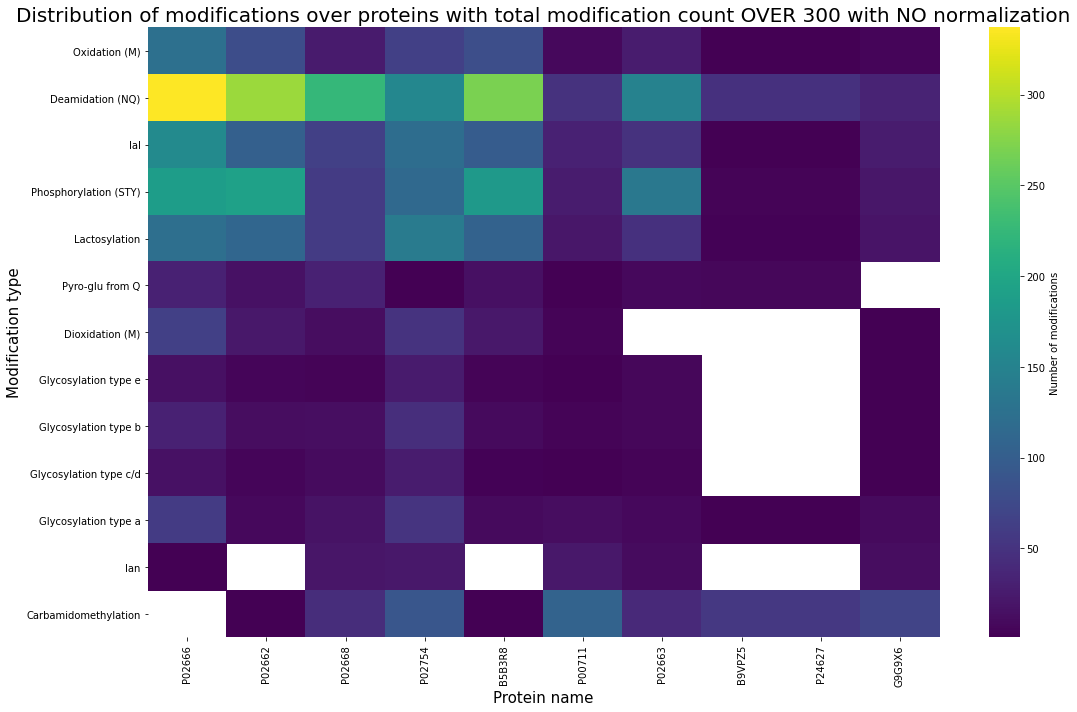

In [2]:
from utils import get_modification_count_per_protein

modPd = pd.DataFrame(get_modification_count_per_protein(df, 100, ""))
plt.figure(figsize=(16,10))
ax = sns.heatmap(modPd, cmap="viridis", cbar_kws={'label': 'Number of modifications'})
plt.title('Distribution of modifications over proteins with total modification count OVER 300 with NO normalization', fontsize = 20) # title with fontsize 20
plt.xlabel('Protein name', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Modification type', fontsize = 15) # y-axis label with fontsize 15
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

P02666
P02662
P02668
P02754
B5B3R8
P00711
P02663
B9VPZ5
P24627
G9G9X6


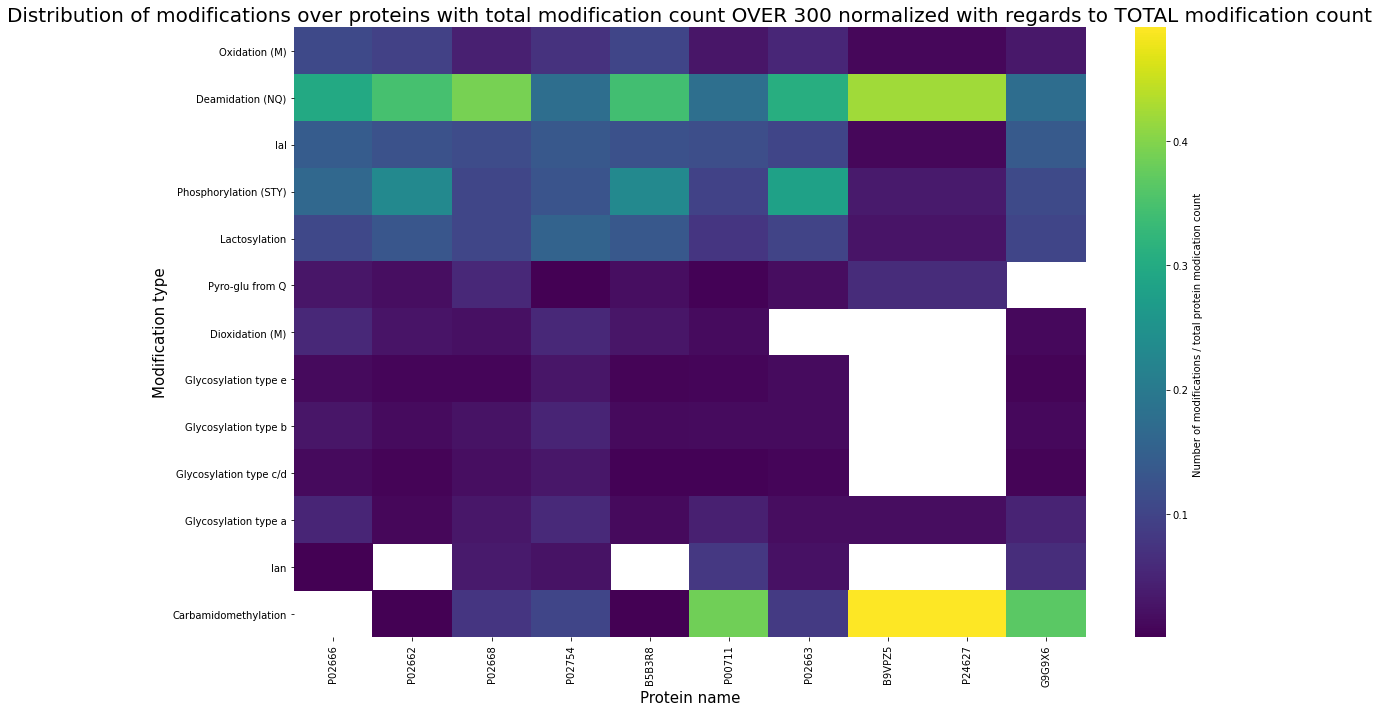

In [3]:
from utils import get_modification_count_per_protein

modPd = pd.DataFrame(get_modification_count_per_protein(df, 100, "protein_total_mod_count"))
plt.figure(figsize=(16,10))
ax = sns.heatmap(modPd, cmap="viridis", cbar_kws={'label': 'Number of modifications / total protein modication count '})
plt.title('Distribution of modifications over proteins with total modification count OVER 300 normalized with regards to TOTAL modification count', fontsize = 20) # title with fontsize 20
plt.xlabel('Protein name', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Modification type', fontsize = 15) # y-axis label with fontsize 15
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

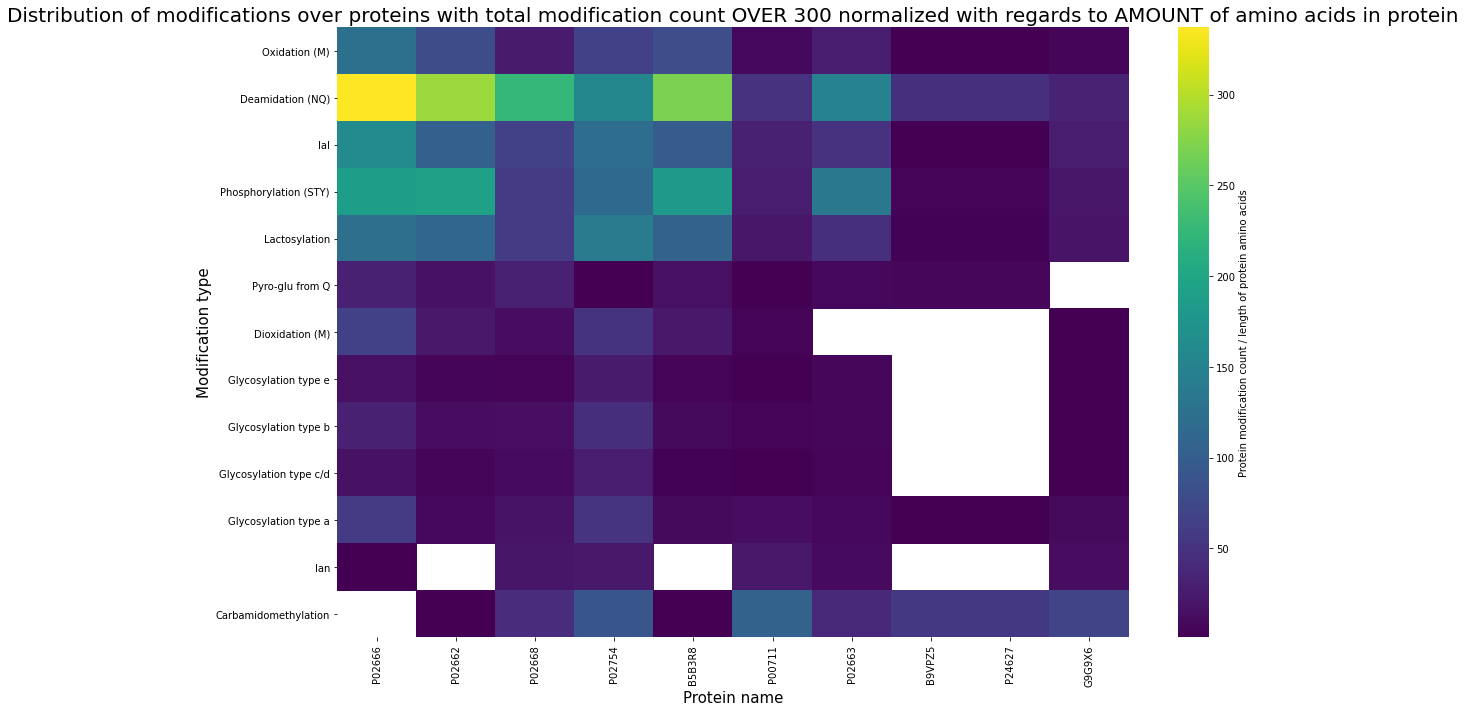

In [4]:
from utils import get_modification_count_per_protein

modPd = pd.DataFrame(get_modification_count_per_protein(df, 100, "amino_acid_length"))
plt.figure(figsize=(16,10))
ax = sns.heatmap(modPd, cmap="viridis", cbar_kws={'label': 'Protein modification count / length of protein amino acids'})
plt.title('Distribution of modifications over proteins with total modification count OVER 300 normalized with regards to AMOUNT of amino acids in protein', fontsize = 20) # title with fontsize 20
plt.xlabel('Protein name', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Modification type', fontsize = 15) # y-axis label with fontsize 15
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

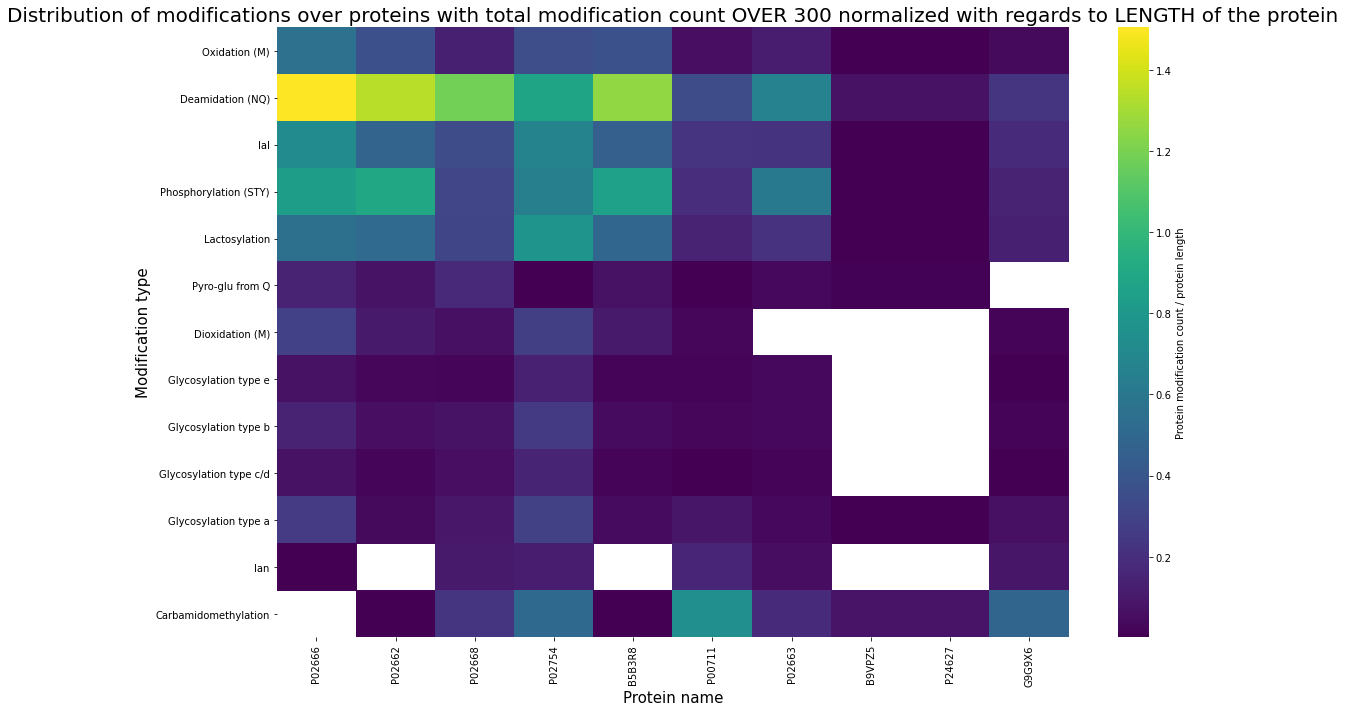

In [5]:
from utils import get_modification_count_per_protein

modPd = pd.DataFrame(get_modification_count_per_protein(df, 100, "protein_length"))
plt.figure(figsize=(16,10))
ax = sns.heatmap(modPd, cmap="viridis", cbar_kws={'label': 'Protein modification count / protein length'})
plt.title('Distribution of modifications over proteins with total modification count OVER 300 normalized with regards to LENGTH of the protein', fontsize = 20) # title with fontsize 20
plt.xlabel('Protein name', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Modification type', fontsize = 15) # y-axis label with fontsize 15
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

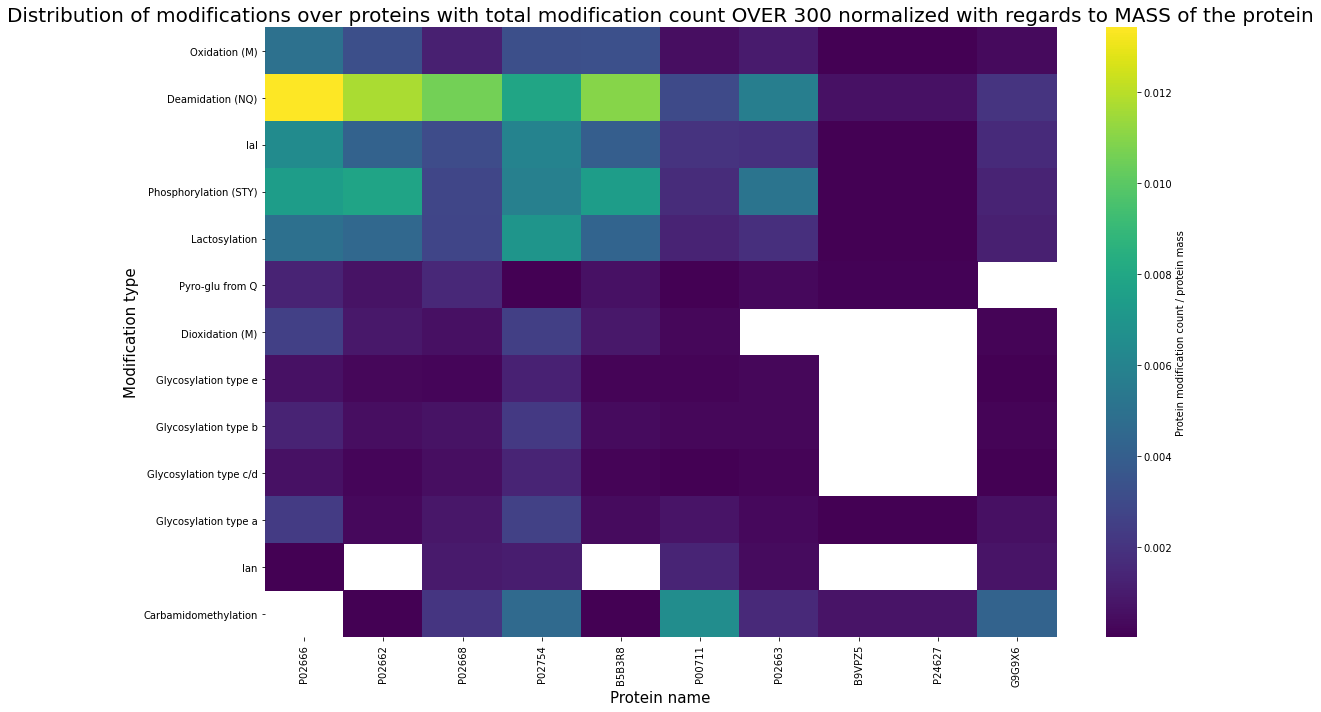

In [6]:
from utils import get_modification_count_per_protein

modPd = pd.DataFrame(get_modification_count_per_protein(df, 100, "protein_mass"))
plt.figure(figsize=(16,10))
ax = sns.heatmap(modPd, cmap="viridis", cbar_kws={'label': 'Protein modification count / protein mass'})
plt.title('Distribution of modifications over proteins with total modification count OVER 300 normalized with regards to MASS of the protein', fontsize = 20) # title with fontsize 20
plt.xlabel('Protein name', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Modification type', fontsize = 15) # y-axis label with fontsize 15
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

(Row:0, Col:0)
(Row:0, Col:1)
(Row:1, Col:0)
(Row:1, Col:1)
(Row:2, Col:0)
(Row:2, Col:1)


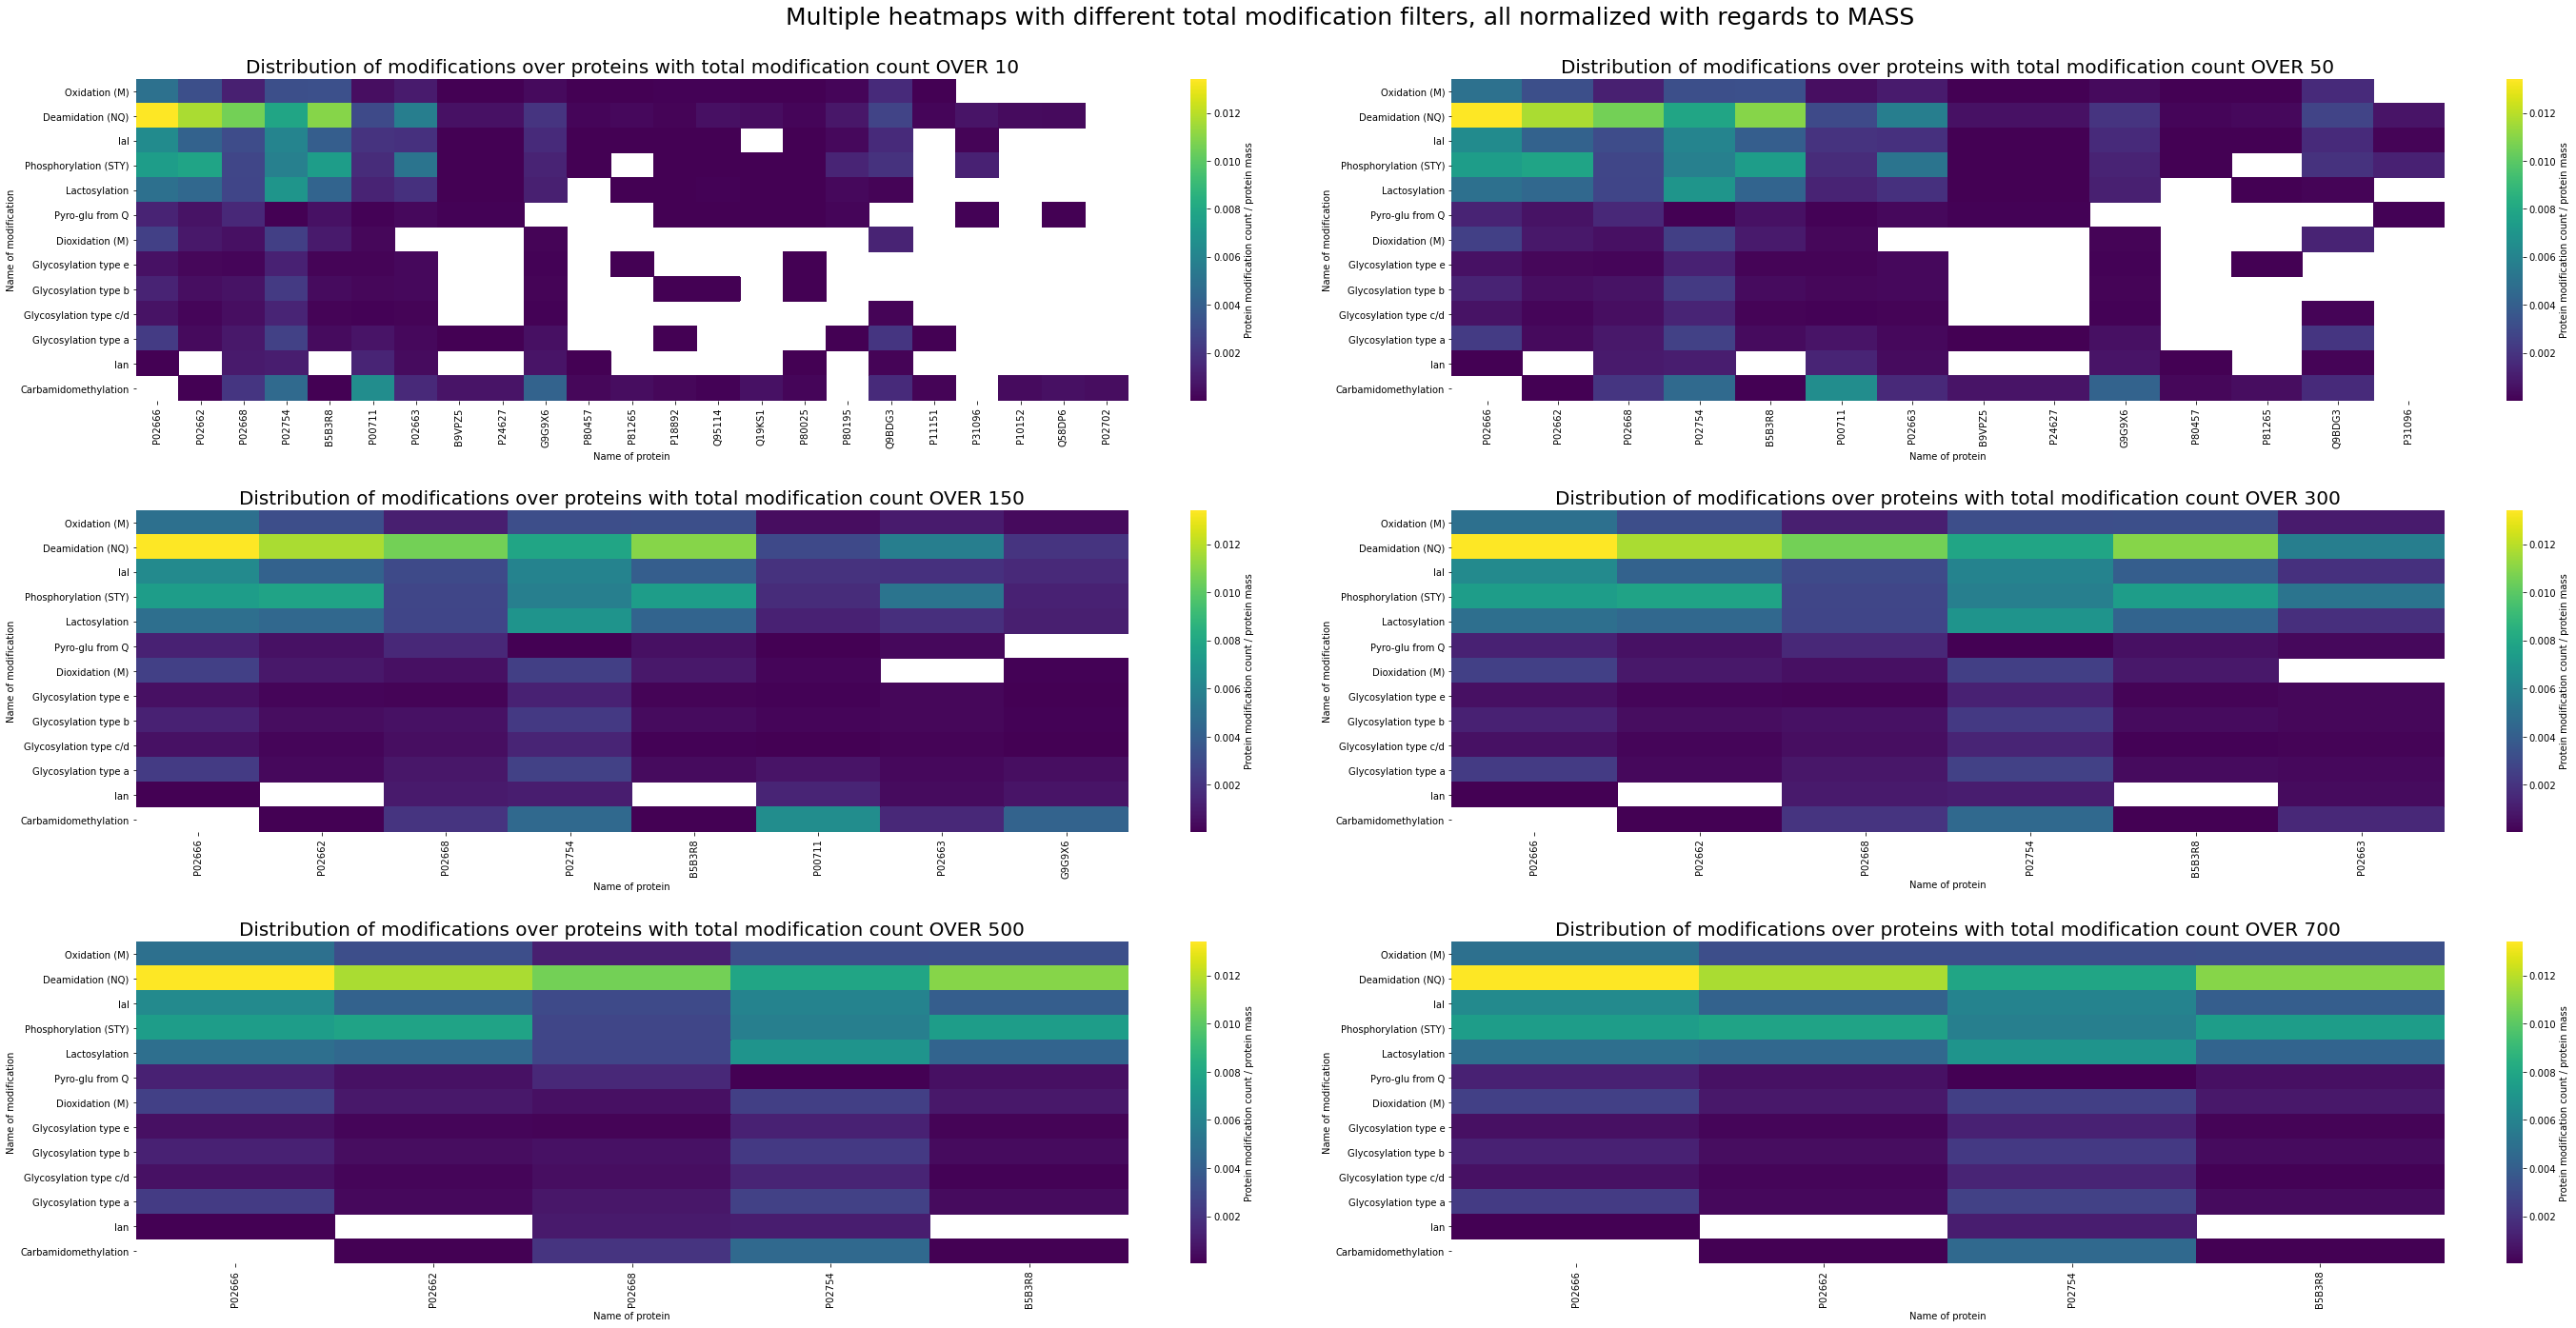

In [7]:
from utils import get_modification_count_per_protein
import math

modFilterList = [10, 50, 150, 300, 500, 700]

fig, axs = plt.subplots(ncols=2, nrows=math.ceil(len(modFilterList)/2), figsize=(40,20))

for index, filter in enumerate(modFilterList, start=1):
    row = math.floor((index-1)/2)
    col = 0
    if index % 2 == 0:
        col = 1
    print("(Row:{0}, Col:{1})".format(row,col))
    modPd = pd.DataFrame(get_modification_count_per_protein(df, filter, "protein_mass"))
    ax = sns.heatmap(modPd,cmap="viridis", cbar_kws={'label': 'Protein modification count / protein mass'}, ax=axs[row, col])
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel('Name of protein')
    ax.set_ylabel('Name of modification')
    ax.set_title("Distribution of modifications over proteins with total modification count OVER {0}".format(filter), size=20)

fig.suptitle('Multiple heatmaps with different total modification filters, all normalized with regards to MASS', fontsize=25) # or plt.suptitle('Main title')
fig.tight_layout(pad=3.0)
plt.show()

(Row:0, Col:0)
(Row:0, Col:1)
P02666
P02662
P02668
P02754
B5B3R8
P00711
P02663
(Row:1, Col:0)
(Row:1, Col:1)
(Row:2, Col:0)


IndexError: index 3 is out of bounds for axis 0 with size 3

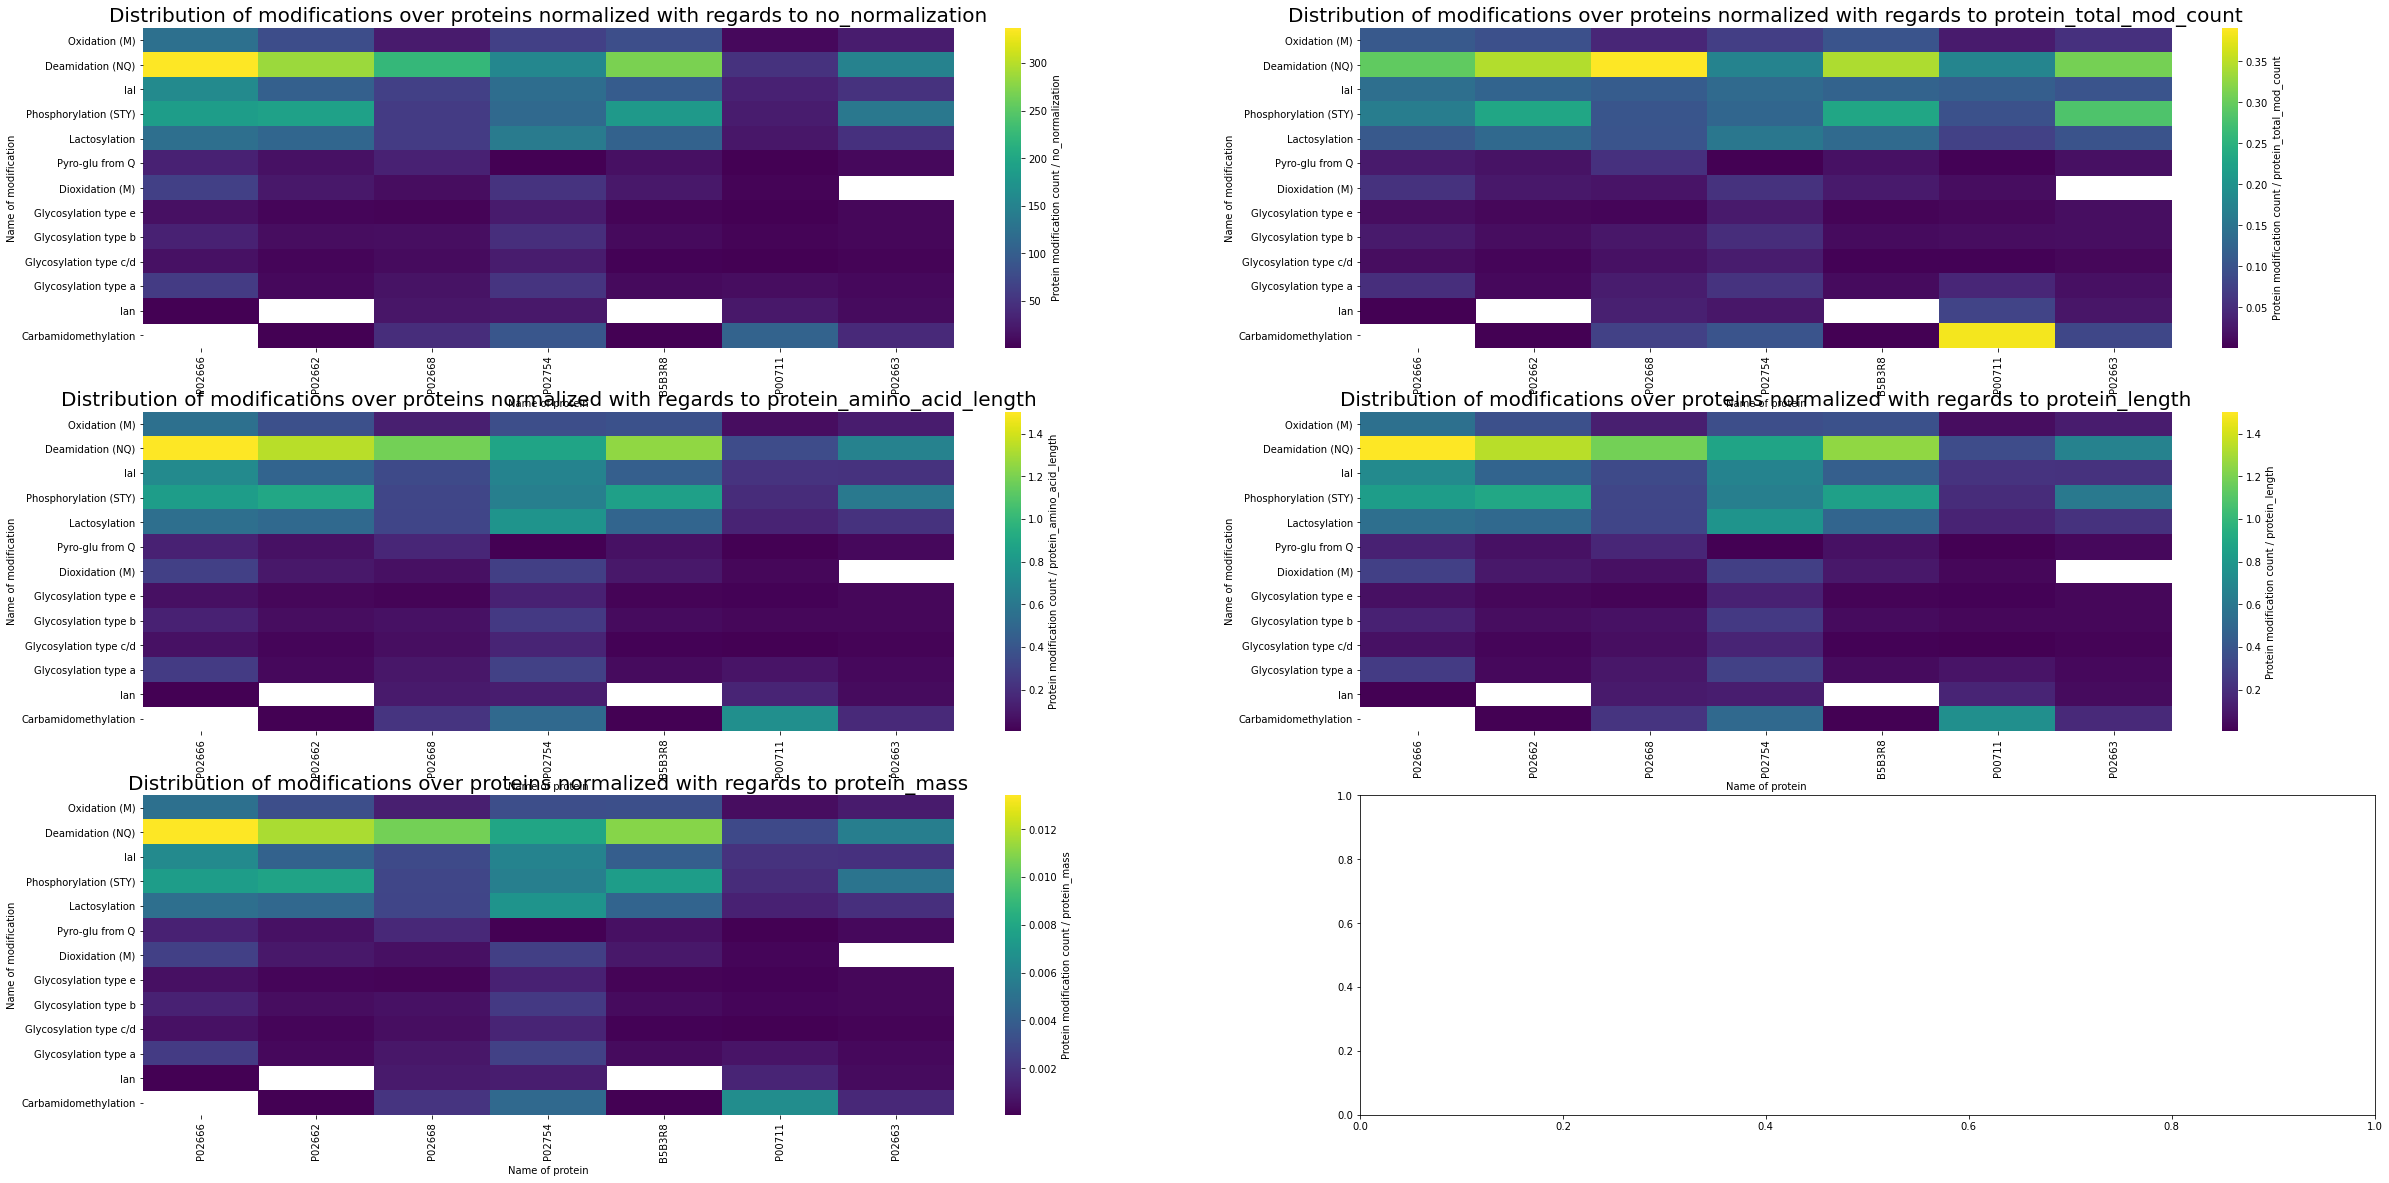

In [22]:
from utils import get_modification_count_per_protein
import math

modFilterTypeList = ['no_normalization', 'protein_total_mod_count', 'protein_amino_acid_length', 'protein_length', 'protein_mass']
fig, axs = plt.subplots(ncols=2, nrows=math.ceil(len(modFilterTypeList)/2), figsize=(40,20))
for index, filterType in enumerate(modFilterTypeList, start=1):
    row = math.floor((index-1)/2)
    col = 0
    if index % 2 == 0:
        col = 1
    print("(Row:{0}, Col:{1})".format(row,col))
    modPd = pd.DataFrame(get_modification_count_per_protein(df, 200, filterType))
    ax = sns.heatmap(modPd,cmap="viridis", cbar_kws={'label': "Protein modification count / {0}".format(filterType)}, ax=axs[row, col])
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel('Name of protein')
    ax.set_ylabel('Name of modification')
    ax.set_title("Distribution of modifications over proteins normalized with regards to {0}".format(filterType), size=20)

if len(modFilterTypeList) % 2 != 0:
    #axs[1, math.ceil(len(modFilterTypeList)/2)].set_axis_off()
    axs.flat[-1].set_visible(False) 

fig.suptitle('Multiple heatmaps with different normalizations. Only includes proteins with total modification count OVER 200', fontsize=25) 

fig.tight_layout(pad=3.0)
plt.show()